In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
data = pd.read_csv('train2.csv', date_parser = True )
data.head()

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
0,0.128348,0.128906,0.128348,0.128348,469033600,0.138588,0.132578,1,0,0
1,0.122210,0.122210,0.121652,0.121652,175884800,0.138979,0.132266,0,1,0
2,0.113281,0.113281,0.112723,0.112723,105728000,0.139732,0.132121,1,0,0
3,0.115513,0.116071,0.115513,0.115513,86441600,0.141071,0.132232,0,1,0
4,0.118862,0.119420,0.118862,0.118862,73449600,0.142215,0.132299,1,0,0


In [4]:
b = data['b']
h = data['h']
s = data['s']

# hot = np.concatenate(, axis=1)
hot = np.column_stack((b, h, s))
hot[-1]

array([0, 1, 0], dtype=int64)

In [5]:
data = data.dropna()
data = data.reset_index(drop=True)

In [6]:
data_training = data[:8000].copy()
data_training

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
0,0.128348,0.128906,0.128348,0.128348,469033600,0.138588,0.132578,1,0,0
1,0.122210,0.122210,0.121652,0.121652,175884800,0.138979,0.132266,0,1,0
2,0.113281,0.113281,0.112723,0.112723,105728000,0.139732,0.132121,1,0,0
3,0.115513,0.116071,0.115513,0.115513,86441600,0.141071,0.132232,0,1,0
4,0.118862,0.119420,0.118862,0.118862,73449600,0.142215,0.132299,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7995,23.957857,24.102858,23.226072,23.430714,812719600,24.062179,23.485129,0,1,0
7996,23.372143,23.892857,23.146786,23.888214,565322800,24.144393,23.428514,0,1,0
7997,23.789642,23.924999,23.612499,23.665358,420128800,24.197661,23.368336,0,1,0
7998,23.553928,23.910000,23.412500,23.686428,437340400,24.264554,23.311350,0,1,0


In [7]:
data_testing = data[8000:].copy()
data_testing

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
8000,24.106428,24.146429,23.952499,24.100000,267416800,24.309964,23.137671,0,1,0
8001,24.116072,24.202499,24.021429,24.052500,202806800,24.292786,23.046429,0,1,0
8002,23.951429,23.983929,23.673214,23.709642,302699600,24.306804,22.953114,0,1,0
8003,23.830357,23.878571,23.473215,23.758572,338321200,24.312572,22.866707,0,1,0
8004,23.777143,24.112143,23.732143,24.106071,367892000,24.302125,22.775021,0,1,0
...,...,...,...,...,...,...,...,...,...,...
10038,113.910004,116.650002,113.550003,116.500000,106243800,115.336002,115.336002,0,1,0
10039,115.699997,116.120003,112.250000,113.160004,161498200,115.045002,115.045002,0,1,0
10040,114.620003,115.550003,114.129997,115.080002,96849000,115.673335,115.673335,0,1,0
10041,116.250000,116.400002,114.589996,114.970001,83477200,115.970001,115.970001,1,0,0


In [6]:
#data_training = data_training.drop(['Date','Adj Close'], axis = 1)

In [6]:
scaler = MinMaxScaler() #read on this from the sklearn - Rich to Rich
data_training = scaler.fit_transform(data_training) #scales data to reduce error
data_training

array([[0.00324658, 0.00326536, 0.0033009 , ..., 1.        , 0.        ,
        0.        ],
       [0.00299331, 0.00298944, 0.00302197, ..., 0.        , 1.        ,
        0.        ],
       [0.00262489, 0.00262149, 0.00265002, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.97954608, 0.98385523, 0.98156698, ..., 0.        , 1.        ,
        0.        ],
       [0.96982017, 0.98323715, 0.97323574, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [7]:
data_training[:,[7,8,9]]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [8]:
data_training.shape

(8000, 10)

In [9]:
X_train = []
y_train = []

In [10]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i]) #sliding window of data to help predict next day
    y_train.append(data_training[i,[7,8,9]]) #60 chosen arbitrarily

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train) #converted to np array

In [12]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [14]:
# LSTM MODEL

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [14]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 3))

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            17040     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [18]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['accuracy']) #find a different loss function for classification
history = regressor.fit(X_train, y_train, epochs=100, batch_size=320)

Epoch 1/100
25/25 [==============================] - 21s 847ms/step - loss: 0.0461 - accuracy: 0.9266
Epoch 2/100
25/25 [==============================] - 21s 835ms/step - loss: 0.0444 - accuracy: 0.9266
Epoch 3/100
25/25 [==============================] - 21s 844ms/step - loss: 0.0428 - accuracy: 0.9262
Epoch 4/100
25/25 [==============================] - 22s 893ms/step - loss: 0.0414 - accuracy: 0.9296
Epoch 5/100
25/25 [==============================] - 22s 870ms/step - loss: 0.0398 - accuracy: 0.9336
Epoch 6/100
25/25 [==============================] - 22s 897ms/step - loss: 0.0386 - accuracy: 0.9355
Epoch 7/100
25/25 [==============================] - 22s 885ms/step - loss: 0.0379 - accuracy: 0.9378
Epoch 8/100
25/25 [==============================] - 22s 873ms/step - loss: 0.0375 - accuracy: 0.9377
Epoch 9/100
25/25 [==============================] - 24s 962ms/step - loss: 0.0371 - accuracy: 0.9389
Epoch 10/100
25/25 [==============================] - 23s 926ms/step - loss: 0.037

In [19]:
data_testing.head()

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
8000,24.106428,24.146429,23.952499,24.100000,267416800,24.309964,23.137671,0,1,0
8001,24.116072,24.202499,24.021429,24.052500,202806800,24.292786,23.046429,0,1,0
8002,23.951429,23.983929,23.673214,23.709642,302699600,24.306804,22.953114,0,1,0
8003,23.830357,23.878571,23.473215,23.758572,338321200,24.312572,22.866707,0,1,0
8004,23.777143,24.112143,23.732143,24.106071,367892000,24.302125,22.775021,0,1,0


In [20]:
data_train = data[:8000].copy()

In [21]:
past_60_days = data_train.tail(60)

In [22]:
df = past_60_days.append(data_testing, ignore_index = True) #for the fist 60 values of testing data set
df.head()

,Open,High,Low,Close,Volume,20_day,50_day,b,h,s
0,20.053572,20.267857,19.589285,20.153214,556995600,20.544321,21.209500,0,1,0
1,20.045357,20.231071,19.940357,20.101072,388214400,20.594732,21.257643,0,1,0
2,20.277500,20.494642,20.196428,20.409286,401455600,20.660053,21.306214,0,1,0
3,20.617500,20.618572,20.375000,20.418571,379766800,20.728768,21.352557,0,1,0
4,20.414286,20.735001,20.321428,20.725714,347516400,20.789768,21.407121,0,1,0


In [23]:
inputs = scaler.transform(df) #scaling data
# inputs
#inputs = df.copy()

In [24]:
X_test = []
y_test = []
#reformatting and now feeding data into the model for prediction
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, [7,8,9]])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [25]:
np.array(inputs[61,[7,8,9]])

array([0., 1., 0.])

In [26]:
# X_test[0]

In [35]:
y_pred = regressor.predict(X_test) #predicted values for bhs

In [36]:
y_pred

array([[-9.9844486e-04,  1.0152357e+00, -1.5337445e-02],
       [-1.1482723e-03,  1.0153282e+00, -1.5497558e-02],
       [-1.3015755e-03,  1.0154392e+00, -1.5659429e-02],
       ...,
       [-5.2462305e+03, -4.0835645e+03,  1.5976666e+04],
       [ 4.4674497e-02,  5.6307405e-01,  7.8499354e-02],
       [ 4.4674497e-02,  5.6307405e-01,  7.8499354e-02]], dtype=float32)

In [38]:
#y_pred[2000:]

In [37]:
scaler.scale_ #generated coefficient for scaling our data back to initial

array([4.12614585e-02, 4.12080197e-02, 4.16564383e-02, 4.15242368e-02,
       1.34766313e-10, 4.12238761e-02, 4.24183490e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

In [157]:
# scale = 1/4.12614585e-02
# scale

24.23569200783341

In [178]:
# y_pred = (y_pred*scale)
#y_test = y_test*scale

In [44]:
for i in range(y_pred.shape[0]):
    #print(i,y_pred[i])
    k = (np.argmax(y_pred[i]))
    y_pred[i] = [0,0,0]
    y_pred[i][k] = 1
    #for dealing with the negative and non-format abiding output predictions

In [31]:
y_pred.shape[0] ## Total predictions

2043

In [48]:
count = 0
for i in range(y_pred.shape[0]):
    if np.array_equal(y_pred[i],y_test[i]):
        pass
    else:
        count+=1
print("No of Times where our model predicted wrong output",count)
# print(i,y_pred[i],y_test[i])

No of Times where our model predicted wrong output 416


In [33]:
import matplotlib.pyplot as plt

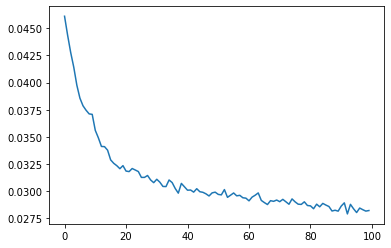

In [34]:
plt.plot(history.history['loss'])

In [47]:
# history.history['loss']
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

scaler = MinMaxScaler() #read on this from the sklearn - Rich to Rich
data = scaler.fit_transform(data) #scales data to reduce error

game_sizes = [5,25,45,65,85]
losses = []
for game_size in game_sizes:
    X_train = []
    y_train = []
    for games in range(25):
        starting_index = random.randint(0,len(data)-2*game_size-1)
        play_range_data = data[starting_index:starting_index+game_size]
        
        X_train = list(X_train)
        y_train = list(y_train)
        for i in range(2, play_range_data.shape[0]):
            X_train.append(play_range_data[i-2:i])
            y_train.append(play_range_data[i,[7,8,9]])
            
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    regressor = Sequential()

    regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units = 120, activation = 'relu'))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units = 3))

    regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['accuracy']) #find a different loss function for classification
    history = regressor.fit(X_train, y_train, epochs=100, batch_size=game_size)
#     plt.plot(history.history['loss'], label = str(game_size))
    losses.append(history.history['loss'])
    
    
    
# plt.ylabel('Loss')
# plt.title('Loss for Each Game Size')
# plt.xlabel('Epochs')
# plt.legend(loc='best')

# # plt.show()

# plt.xlim(20,100)

# # plt.show()

# plt.plot()

Epoch 1/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.9200
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2359 - accuracy: 0.9867
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9867
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 0.9867
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 0.9867
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0122 - accuracy: 0.9867
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9867
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0123 - accuracy: 0.9867
Epoch 9/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9867
Epoch 10/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.9867
Epoch 11/

15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9867
Epoch 84/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 0.9867
Epoch 85/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9867
Epoch 86/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9867
Epoch 87/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9867
Epoch 88/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9867
Epoch 89/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9867
Epoch 90/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9867
Epoch 91/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9867
Epoch 92/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.9867
Epoch 93/100


23/23 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 0.9652
Epoch 66/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0222 - accuracy: 0.9670
Epoch 67/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9670
Epoch 68/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0222 - accuracy: 0.9617
Epoch 69/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9704
Epoch 70/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 0.9635
Epoch 71/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0206 - accuracy: 0.9687
Epoch 72/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9652
Epoch 73/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0206 - accuracy: 0.9670
Epoch 74/100
23/23 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.9670
Epoch 75/100


24/24 [==============================] - 0s 6ms/step - loss: 0.0307 - accuracy: 0.9526
Epoch 48/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0306 - accuracy: 0.9526
Epoch 49/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9526
Epoch 50/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0307 - accuracy: 0.9516
Epoch 51/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0294 - accuracy: 0.9544
Epoch 52/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9544
Epoch 53/100
24/24 [==============================] - 0s 7ms/step - loss: 0.0297 - accuracy: 0.9544
Epoch 54/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0295 - accuracy: 0.9563
Epoch 55/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0293 - accuracy: 0.9544
Epoch 56/100
24/24 [==============================] - 0s 6ms/step - loss: 0.0297 - accuracy: 0.9535
Epoch 57/100


25/25 [==============================] - 0s 7ms/step - loss: 0.0322 - accuracy: 0.9517
Epoch 30/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.9524
Epoch 31/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.9498
Epoch 32/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.9517
Epoch 33/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0316 - accuracy: 0.9524
Epoch 34/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0308 - accuracy: 0.9517
Epoch 35/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.9524
Epoch 36/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0310 - accuracy: 0.9517
Epoch 37/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9517
Epoch 38/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0313 - accuracy: 0.9517
Epoch 39/100


25/25 [==============================] - 0s 9ms/step - loss: 0.0383 - accuracy: 0.9455
Epoch 11/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0377 - accuracy: 0.9455
Epoch 12/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0378 - accuracy: 0.9455
Epoch 13/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0368 - accuracy: 0.9460
Epoch 14/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0368 - accuracy: 0.9460
Epoch 15/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0360 - accuracy: 0.9455
Epoch 16/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.9455
Epoch 17/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 0.9455
Epoch 18/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0362 - accuracy: 0.9460
Epoch 19/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0361 - accuracy: 0.9451
Epoch 20/100

25/25 [==============================] - 0s 9ms/step - loss: 0.0332 - accuracy: 0.9480
Epoch 92/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0330 - accuracy: 0.9460
Epoch 93/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.9451
Epoch 94/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.9470
Epoch 95/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.9465
Epoch 96/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0330 - accuracy: 0.9460
Epoch 97/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0329 - accuracy: 0.9475
Epoch 98/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9460
Epoch 99/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0330 - accuracy: 0.9465
Epoch 100/100
25/25 [==============================] - 0s 8ms/step - loss: 0.0332 - accuracy: 0.9451


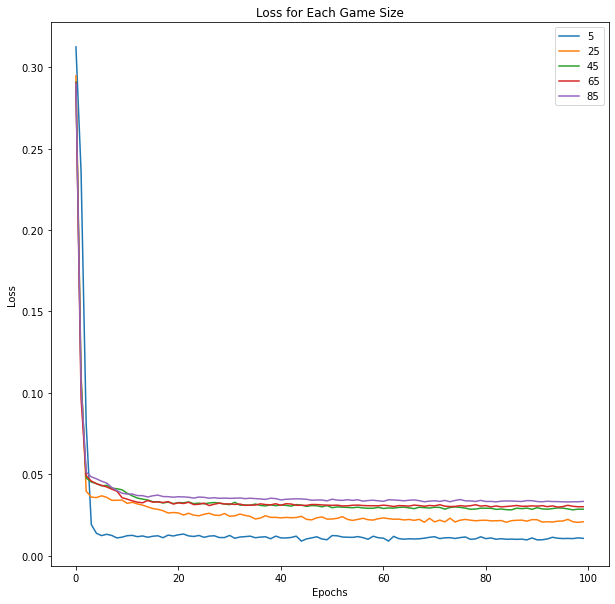

In [61]:
plt.figure(figsize=(10, 10))
for loss,size in zip(losses,game_sizes):
    plt.plot(loss,label=size)
plt.ylabel('Loss')
plt.title('Loss for Each Game Size')
plt.xlabel('Epochs')
plt.legend(loc='best')

plt.show()

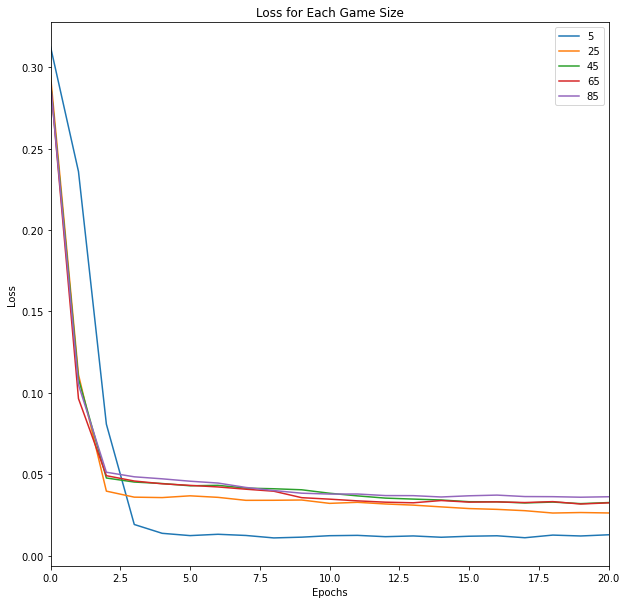

In [63]:
plt.figure(figsize=(10, 10))
for loss,size in zip(losses,game_sizes):
    plt.plot(loss,label=size)
plt.ylabel('Loss')
plt.title('Loss for Each Game Size')
plt.xlabel('Epochs')
plt.legend(loc='best')

plt.xlim(0,20)

plt.show()

# put in report of compounding accuracy i.e. 0.98*0.98 etc.

(0.0, 0.04)

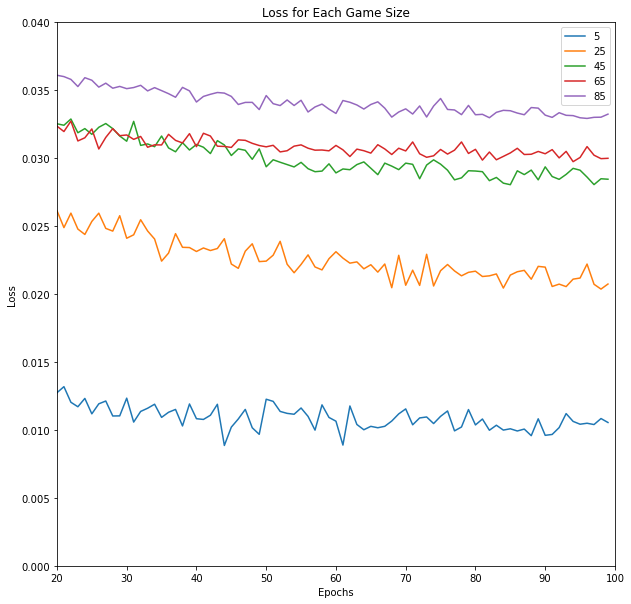

In [60]:
plt.figure(figsize=(10, 10))
for loss,size in zip(losses,game_sizes):
    plt.plot(loss,label=size)
plt.ylabel('Loss')
plt.title('Loss for Each Game Size')
plt.xlabel('Epochs')
plt.legend(loc='best')


plt.xlim(20,100)
plt.ylim(0,0.04)


# plt.show()

In [ ]:
# The x-axis should be actual NN output, and the y-axis should be target NN output.  
# So you should have 5 scatter plots, one per problem instance.
# with our now 5 trained models, predict